In [0]:
% cp drive/'My Drive'/DAVIS.zip -d ./
! unzip DAVIS.zip

In [0]:
! pip install -U segmentation-models

In [0]:
% cp -r DAVIS/JPEGImages/480p/aval/blackswan/. -d DAVIS/JPEGImages/480p/aval/aaset/

In [0]:
import segmentation_models as sm
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
keras.backend.set_image_data_format('channels_last')

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [0]:
!nvidia-smi

Wed Apr 29 06:09:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
image_datagen = ImageDataGenerator( rotation_range=90,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2, horizontal_flip=True,
                   vertical_flip = True, rescale= 1./255)
mask_datagen = ImageDataGenerator( rotation_range=90,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2, horizontal_flip=True,
                   vertical_flip = True, rescale= 1./255)
image_datagen1 = ImageDataGenerator(featurewise_center=False,
                                   featurewise_std_normalization=False,
                                   rescale= 1./255)
mask_datagen1 = ImageDataGenerator(rescale= 1./255)
seed = 1
#训练图片路径
image_generator = image_datagen.flow_from_directory(
    'DAVIS/JPEGImages/480p/atrain',target_size=(480,832),
    class_mode=None,batch_size=8,
    seed=seed)
# 指定mask
mask_generator = mask_datagen.flow_from_directory(
    'DAVIS/Annotations/480p/atrain',target_size=(480,832),
    class_mode=None,batch_size=8,
    color_mode = 'grayscale',
    seed=seed)
#训练图片路径
image_generator1 = image_datagen1.flow_from_directory(
    'DAVIS/JPEGImages/480p/aval',target_size=(480,832),
    class_mode=None,batch_size=8,
    seed=1)
#指定mask
mask_generator1 = mask_datagen1.flow_from_directory(
    'DAVIS/Annotations/480p/aval',target_size=(480,832),
    class_mode=None,batch_size=8,
    color_mode = 'grayscale',
    seed=seed)
#将以上两个生成器合为一个
def combine_generator(gen1, gen2):
    while True:
        yield(gen1.next(), gen2.next())   
train_generator = combine_generator(image_generator, mask_generator)
val_generator = combine_generator(image_generator1, mask_generator1)
# 


Found 2079 images belonging to 31 classes.
Found 2079 images belonging to 31 classes.
Found 1376 images belonging to 21 classes.
Found 1376 images belonging to 20 classes.


In [0]:
image_datagen = ImageDataGenerator(featurewise_center=False,
                                   featurewise_std_normalization=False,
                                   rescale= 1./255)
mask_datagen = ImageDataGenerator(rescale= 1./255)
 
seed = 1
# #训练图片路径
# image_generator = image_datagen.flow_from_directory(
#     'DAVIS/JPEGImages/480p/aval/as',target_size=(480,832),
#     class_mode=None,batch_size=1,
#     seed=1)
# # 指定mask
# mask_generator = mask_datagen.flow_from_directory(
#     'DAVIS/Annotations/480p/aval/as',target_size=(480,832),
#     class_mode=None,batch_size=1,
#     color_mode = 'grayscale',
#     seed=seed)
# #训练图片路径
image_generator = image_datagen.flow(img2np('DAVIS/JPEGImages/480p/aval/blackswan/00000.jpg'),y=None,
                    seed = 1, batch_size = 1)
mask_generator = mask_datagen.flow(img2np('DAVIS/Annotations/480p/aval/blackswan/00000.png'),y=None,
                    seed = 1, batch_size = 1)
image_generator1 = image_datagen.flow_from_directory(
    'DAVIS/JPEGImages/480p/aval/ass',target_size=(480,832),
    class_mode=None,batch_size=1,
    seed=1)
#指定mask
mask_generator1 = mask_datagen.flow_from_directory(
    'DAVIS/Annotations/480p/aval/ass',target_size=(480,832),
    class_mode=None,batch_size=1,
    color_mode = 'grayscale',
    seed=seed)
#将以上两个生成器合为一个
def combine_generator(gen1, gen2):
    while True:
        yield(gen1.next(), gen2.next())   
train_generator = combine_generator(image_generator, mask_generator)
val_generator = combine_generator(image_generator1, mask_generator1)
# 


FileNotFoundError: ignored

In [0]:
model = sm.Unet()

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
model.load_weights('drive/My Drive/kite-surf.h5')

ValueError: ignored

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],)
model.fit_generator(
    train_generator,
    steps_per_epoch=1000,
    epochs=5,
    validation_data=val_generator,validation_steps=172,initial_epoch = 0)

Epoch 1/5
1000/1000 [==============================] - 1060s 1s/step - loss: 0.3649 - iou_score: 0.7209 - val_loss: 0.6309 - val_iou_score: 0.5849
Epoch 2/5
1000/1000 [==============================] - 1017s 1s/step - loss: 0.2307 - iou_score: 0.8263 - val_loss: 0.6680 - val_iou_score: 0.5717
Epoch 3/5
 158/1000 [===>..........................] - ETA: 13:36 - loss: 0.2995 - iou_score: 0.7898

KeyboardInterrupt: ignored

In [0]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
def img2np(src):
  img = image.load_img(src, target_size=(480, 832))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x*(1./255)
  return x
def let_me_see(dir,num):
  src = dir+'/'+num
  x=img2np(src)
  y=model.predict(x)
  y=y*255
  plt.imshow(y[0].squeeze(2))
  save_name ='a/'+num
  plt.savefig(save_name)
  #plt.show()



In [0]:
!rm -r a/.ipynb_checkpoints

In [0]:

import cv2
import os
import numpy as np
from PIL import Image
 
 
def frame2video(im_dir,video_dir,fps):
 
    im_list = os.listdir(im_dir)
    im_list.sort()  #最好再看看图片顺序对不
    img = Image.open(os.path.join(im_dir,im_list[0]))
    img_size = img.size #获得图片分辨率，im_dir文件夹下的图片分辨率需要一致
 
 
    # fourcc = cv2.cv.CV_FOURCC('M','J','P','G') #opencv版本是2
    fourcc = cv2.VideoWriter_fourcc(*'XVID') #opencv版本是3
    videoWriter = cv2.VideoWriter(video_dir, fourcc, fps, img_size)
    # count = 1
    for i in im_list:
        im_name = os.path.join(im_dir+i)
        frame = cv2.imdecode(np.fromfile(im_name, dtype=np.uint8), -1)
        videoWriter.write(frame)
        # count+=1
        # if (count == 200):
        #     print(im_name)
        #     break
    videoWriter.release()
    print('finish')
 

im_dir = 'a/'#帧存放路径
video_dir = 'video.avi' #合成视频存放的路径
fps = 30 #帧率，每秒钟帧数越多，所显示的动作就会越流畅
frame2video(im_dir, video_dir, fps)


finish


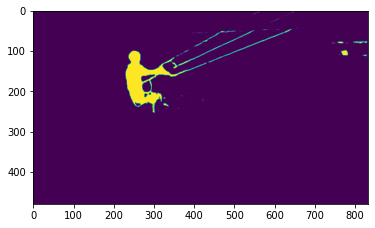

In [0]:
import cv2
import os
outer_path = 'Val/data_Pic/kite-surf/kite-surf'
folderlist = os.listdir(outer_path)          #列举文件夹
for folder in folderlist:
  let_me_see(outer_path,folder)

  


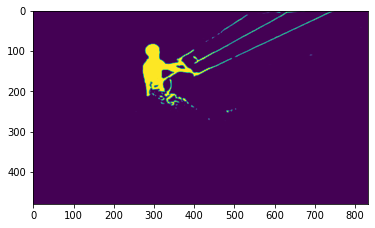

In [0]:
let_me_see('/content/Val/data_Pic/kite-surf/kite-surf/00002.jpg')


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],)
model.fit_generator(
    train_generator,
    steps_per_epoch=1000,
    epochs=55,
    validation_data=val_generator,validation_steps=172,initial_epoch = 54)

Epoch 55/55
1000/1000 [==============================] - 1182s 1s/step - loss: 0.0904 - iou_score: 0.9305 - val_loss: 0.6106 - val_iou_score: 0.6233


In [0]:
model.save('65iou.h5')

In [0]:
model.fit_generator(
    train_generator,
    steps_per_epoch=259,
    epochs=16,
    validation_data=val_generator,validation_steps=172,
    initial_epoch=15)

Epoch 16/16
259/259 [==============================] - 152s 587ms/step - loss: 0.0461 - iou_score: 0.9634 - val_loss: 0.7162 - val_iou_score: 0.6251


In [0]:
model.save('62iou.h5')

In [0]:
! pip install -U segmentation-models

In [0]:
import segmentation_models as sm
import keras
from keras import optimizers
keras.backend.set_image_data_format('channels_last')

Segmentation Models: using `keras` framework.


In [0]:
# model = sm.Unet()
# model = sm.Unet('resnet34', encoder_weights='imagenet')
# model = sm.Unet('resnet34', classes=1, activation='sigmoid')
model = sm.Unet('resnet34',classes=1, activation='sigmoid',input_shape=(None, None, 3), encoder_weights='imagenet')

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss=sm.losses.cc,
    metrics=[sm.metrics.iou_score],)
model.fit_generator(
    train_generator,
    steps_per_epoch=428,
    epochs=20)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
428/428 [==============================] - 210s 490ms/step - loss: 0.4738 - iou_score: 0.6113
Epoch 2/20
428/428 [==============================] - 202s 472ms/step - loss: 0.1671 - iou_score: 0.8656
Epoch 3/20
428/428 [==============================] - 200s 466ms/step - loss: 0.1261 - iou_score: 0.8997
Epoch 4/20
428/428 [==============================] - 200s 466ms/step - loss: 0.1044 - iou_score: 0.9170
Epoch 5/20
428/428 [==============================] - 200s 466ms/step - loss: 0.0934 - iou_score: 0.9259
Epoch 6/20
428/428 [==============================] - 200s 466ms/step - loss: 0.0871 - iou_score: 0.9311
Epoch 7/20
428/428 [==============================] - 199s 466ms/step - loss: 0.0820 - iou_score: 0.9353
Epoch 8/20
428/428 [==============================] - 200s 466ms/step - loss: 0.0789 - iou_score: 0.9377
Epoch 9/20
428/428 [==============================] - 200s 467

In [0]:
model.save('kite-surf.h5')

In [0]:
import cv2
import os
outer_path = 'DAVIS/JPEGImages/480p/aval'
folderlist = os.listdir(outer_path)          #列举文件夹
i = 0
for folder in folderlist:
  os.mkdir('data_One_mask/'+folder)
  os.mkdir('data_One_mask/'+folder+'/'+folder)

In [0]:
% cp drive/'My Drive'/Val.zip -d ./
! unzip Val.zip

In [0]:
dict

dict

In [0]:
import cv2
import os
outer_path = 'DAVIS/Annotations/480p'
folderlist = os.listdir(outer_path)          #列举文件夹
for folder in folderlist:     
  inner_path = os.path.join(outer_path, folder)
  total_num_folder = len(folderlist)       #文件夹的总数
	
  print('total have %d folders' % (total_num_folder)  ) #打印文件夹的总数	
  filelist = os.listdir(inner_path)        #列举图片
  i = 0
  for item in filelist:
    total_num_file = len(filelist)       #单个文件夹内图片的总数
    if item.endswith('.png'):
      src = os.path.join(os.path.abspath(inner_path), item)
      img = cv2.imread(src)
			#dst = os.path.join(os.path.abspath(inner_path), str(folder) + '_' + str(i) + '.jpg')       
      cropped = img[0:480, 11:843, 0:1]  # 裁剪坐标为[y0:y1, x0:x1]
      cv2.imwrite(src, cropped)
  print('total %d to rename & converted %d jpgs' % (total_num_file, i))

In [0]:

import os
def load_shot(folder,idx):
  outer_path = 'Val/data_Mask'
  folderlist = os.listdir(outer_path)          #列举文件夹
  index='000'+idx+'.png'
  src = os.path.join(outer_path, folder, folder, index)
  dst = os.path.join('Val/data_One_mask',folder,folder,'shot.png')
  % cp {src} {dst}
  outer_path = 'Val/data_Pic'
  folderlist = os.listdir(outer_path)          #列举文件夹
  index='000'+idx+'.jpg'
  src = os.path.join(outer_path, folder, folder, index)
  dst = os.path.join('Val/data_One_shot',folder,folder,'shot.jpg')
  % cp {src} {dst}

In [0]:
load_shot('blackswan','00')

In [0]:
!zip -r Val.zip Val

In [0]:
dict = {'blackswan': 50,
 'bmx-trees': 80,
 'breakdance': 84,
 'camel': 90,
 'car-roundabout': 75,
 'car-shadow': 40,
 'cows': 104,
 'dance-twirl': 90,
 'dog': 60,
 'drift-chicane': 52,
 'drift-straight': 50,
 'goat': 90,
 'horsejump-high': 50,
 'kite-surf': 50,
 'libby': 49,
 'motocross-jump': 40,
 'paragliding-launch': 80,
 'parkour': 100,
 'scooter-black': 43,
 'soapbox': 99}

In [0]:
def combine_generator(gen1, gen2):
      while True:
          yield(gen1.next(), gen2.next()) 
def val_loader(folder):
  image_datagen = ImageDataGenerator(
                                   rescale= 1./255)
  mask_datagen = ImageDataGenerator(rescale= 1./255)
  image_datagen1 = ImageDataGenerator( rotation_range=90,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2, horizontal_flip=True,
                   vertical_flip = True, rescale= 1./255)
  mask_datagen1 = ImageDataGenerator( rotation_range=90,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2, horizontal_flip=True,
                   vertical_flip = True, rescale= 1./255)
  seed = 1
#训练图片路径
  one_shot = 'Val/data_One_shot/'+folder
  one_mask = 'Val/data_One_mask/'+folder
  val_pic = 'Val/data_Pic/'+folder
  val_mask = 'Val/data_Mask/'+folder
  image_generator = image_datagen1.flow_from_directory(
      one_shot,target_size=(480,832),
      class_mode=None,batch_size=1,
      seed=1)
# 指定mask
  mask_generator = mask_datagen1.flow_from_directory(
      one_mask,target_size=(480,832),
      class_mode=None,batch_size=1,
      color_mode = 'grayscale',
      seed=seed)
#训练图片路径
  image_generator1 = image_datagen.flow_from_directory(
      val_pic,target_size=(480,832),
      class_mode=None,batch_size=1,
      seed=1)
#指定mask
  mask_generator1 = mask_datagen.flow_from_directory(
      val_mask,target_size=(480,832),
      class_mode=None,batch_size=1,
      color_mode = 'grayscale',
      seed=seed)
#将以上两个生成器合为一个  
  train_generator = combine_generator(image_generator, mask_generator)
  val_generator = combine_generator(image_generator1, mask_generator1)
  return train_generator, val_generator

In [0]:
model.summary()

In [0]:
import os
outer_path = 'Val/data_Mask'
folderlist = os.listdir(outer_path)          #列举文件夹
model = sm.Unet('resnet34',classes=1, activation='sigmoid',input_shape=(None, None, 3))
sgd = optimizers.SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
# for layer in model.layers:
#   layer.trainable=True
#   layerName=str(layer.name)
#   if layerName.startswith("decoder") or layerName.startswith("Final_"):
#     layer.trainable=True
#   else: layer.trainable=False


85524480/85521592 [==============================] - 1s 0us/step


In [0]:
folder = 'kite-surf'
sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss=sm.losses.bce_jaccard_loss,
  metrics=[sm.metrics.iou_score],)
load_shot(folder,'00')
train_generator, val_generator = val_loader(folder)
model.load_weights('drive/My Drive/65iou.h5')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=1000,
    epochs=10,verbose = 1,
    validation_data=val_generator, validation_steps=dict[folder],
    initial_epoch=0)
print((history.history)['val_iou_score'][-1])

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 50 images belonging to 1 classes.
Found 50 images belonging to 1 classes.
Epoch 1/10
1000/1000 [==============================] - 198s 198ms/step - loss: 0.3503 - iou_score: 0.6975 - val_loss: 0.4074 - val_iou_score: 0.7276
Epoch 2/10
1000/1000 [==============================] - 186s 186ms/step - loss: 0.3078 - iou_score: 0.7297 - val_loss: 0.3890 - val_iou_score: 0.7369
Epoch 3/10
1000/1000 [==============================] - 185s 185ms/step - loss: 0.2935 - iou_score: 0.7423 - val_loss: 0.3262 - val_iou_score: 0.7412
Epoch 4/10
1000/1000 [==============================] - 186s 186ms/step - loss: 0.2812 - iou_score: 0.7514 - val_loss: 0.3006 - val_iou_score: 0.7447
Epoch 5/10
1000/1000 [==============================] - 186s 186ms/step - loss: 0.2711 - iou_score: 0.7595 - val_loss: 0.2051 - val_iou_score: 0.7492
Epoch 6/10
1000/1000 [==============================] - 186s 186ms/step - loss: 0.2624 - iou

In [0]:
 
for folder in folderlist: 
  print(folder)
  load_shot(folder,'00')
  train_generator, val_generator = val_loader(folder)
  model.load_weights('drive/My Drive/65iou.h5')

  history = model.fit_generator(
    train_generator,
    steps_per_epoch=1,
    epochs=80,verbose = 1,
    validation_data=val_generator, validation_steps=dict[folder],
    initial_epoch=0)
  print((history.history)['val_iou_score'][-1])


In [0]:
a=history.history
a['val_iou_score'][-1]

0.8232626411649916